# One-dimensional (radial) grids

Grid supports several quadrature rules for one-dimensional grids (most of them in the [-1,1] interval). These are used to integrate functions numerically:

$$ \int_{-1}^1 f(x) dx \approx \sum_{i=0}^{N-1} w_i f(x_i) $$

 The following table shows some of the available quadrature rules and the corresponding grid points and weights.


In [60]:
from grid.onedgrid import *

# Select and compare several grid types with 30 points in the interval [-1,1]
# -------------------------------------
npoints = 31
# Gauss-Chebyshev
gaus_cheb = GaussChebyshev(npoints)

# Gauss-Legendre
gaus_leg = GaussLegendre(npoints)

# Tanh-Sinh
tanh_sinh = TanhSinh(npoints)

# Trapezoidal
trap_lob = Trapezoidal(npoints)

# Simpson
simp_lob = Simpson(npoints)

Different quadrature rules have the points located at different positions and thus are appropriate for different problems. A higher point density is usually required where the integrand is more rapidly varying. The following figure shows the points for different quadrature rules supported by Grid.

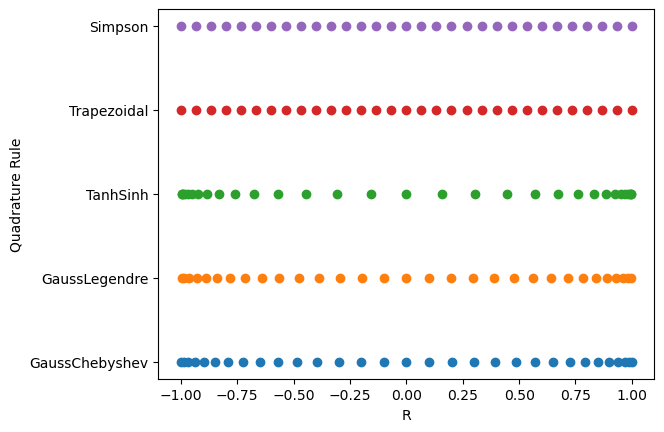

In [61]:
import matplotlib.pyplot as plt

# create a list of names and a list of grid objects
names = ["GaussChebyshev", "GaussLegendre", "TanhSinh", "Trapezoidal", "Simpson"]
onedgrids = [gaus_cheb, gaus_leg, tanh_sinh, trap_lob, simp_lob]


for i in range(len(onedgrids)):
    plt.scatter(
        onedgrids[i].points, [i + 1] * len(onedgrids[i].points), marker="o"
    ) 

# set the y-ticks to be the names
plt.yticks(range(1, len(names) + 1), names)  # Adjusted the range for y-ticks

# set the labels
plt.xlabel("R")
plt.ylabel("Quadrature Rule")

# show the plot
plt.show()

The one-dimensional grids can be used to perform integrals in the defined interval and are very accurate even for a small number of points. 

As an example, let's find the integral of the function $f(x) = \sqrt(1-x^2)$ in the interval $[-1,1]$ using the previously defined grids. The exact value of the integral is $\pi/2$.

The integral of sqrt(1-x^2) from -1 to 1 is pi/2 = 1.5707963267948966
Integral of sqrt(1-x^2) using GaussChebyshev is 1.5707963267948966
Integral of sqrt(1-x^2) using GaussLegendre is 1.5708227035118671
Integral of sqrt(1-x^2) using TanhSinh is 1.5706704474237596
Integral of sqrt(1-x^2) using Trapezoidal is 1.5606957062377849
Integral of sqrt(1-x^2) using Simpson is 1.5668324581559745


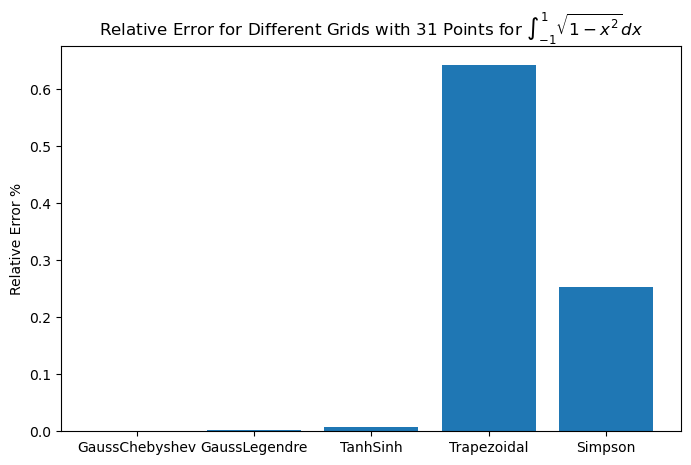

In [62]:
# define the function to integrate
function = lambda x: np.sqrt(1 - x**2)

print("The integral of sqrt(1-x^2) from -1 to 1 is pi/2 =", np.pi / 2)

relative_error = []

for i in range(len(onedgrids)):
    # calculate the function values at the grid points
    vals = function(onedgrids[i].points)
    # integrate the function using the grid
    integral = onedgrids[i].integrate(vals)
    print("Integral of sqrt(1-x^2) using", names[i], "is", integral)
    relative_error.append(np.abs(integral - np.pi / 2) / (np.pi / 2) * 100)

# plot the relative error as columns graph
plt.figure(figsize=(8, 5))
plt.title(
    r"Relative Error for Different Grids with "
    + str(npoints)
    + " Points for $\int_{-1}^1 \sqrt{1-x^2} dx$"
)
plt.bar(names, relative_error)
plt.ylabel("Relative Error %")
plt.show()

The following example shows how the error in the integral converges with the number of points for the different quadrature rules. The function to test is the same as before, $f(x) = \sqrt(1-x^2)$ and the integral is performed in the interval $[-1,1]$.

[[2.82715972e-14 1.41357986e-14 1.41357986e-14 0.00000000e+00]
 [1.32550164e+00 3.25313217e-01 3.47241509e-02 1.41361473e-02]
 [7.06296872e+01 5.30277668e+01 1.68869830e+01 6.11617195e+00]
 [3.63380228e+01 1.30361218e+01 3.32773329e+00 2.01237879e+00]
 [1.51173637e+01 5.26882153e+00 1.31839796e+00 7.94070592e-01]]


Text(0, 0.5, 'Relative Error %')

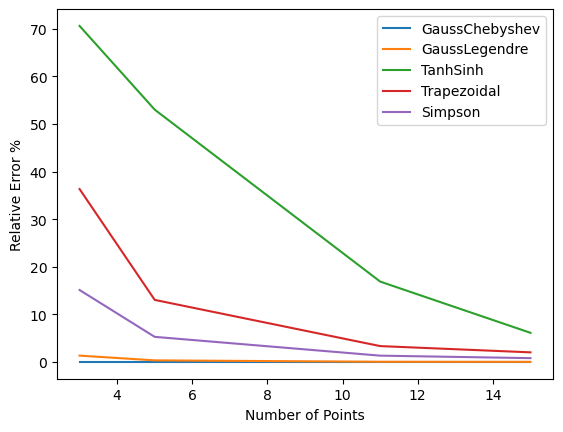

In [63]:
npoints_list = [3, 5, 11, 15]
relative_error = []

for i in range(len(npoints_list)):
    relative_error.append([])
    grid_list = [
        GaussChebyshev(npoints_list[i]),
        GaussLegendre(npoints_list[i]),
        TanhSinh(npoints_list[i]),
        Trapezoidal(npoints_list[i]),
        Simpson(npoints_list[i]),
    ]

    for j in range(len(grid_list)):
        vals = function(grid_list[j].points)
        integral = grid_list[j].integrate(vals)
        relative_error[-1].append(np.abs(integral - np.pi / 2) / (np.pi / 2) * 100)

relative_error = np.array(relative_error).T
print(relative_error)
for i in range(len(names)):
    plt.plot(npoints_list, relative_error[i], label=names[i])
plt.legend()
plt.xlabel("Number of Points")
plt.ylabel("Relative Error %")

#### Transformation of onedgrids integration intervals
The $[-1,1]$ interval is too small for being of real use in quantum chemistry, where the integrals are usually performed in the interval $[0,\infty)$. To solve this issue, Grid supports several transformations of the one-dimensional grids to other intervals. Some of these transformations have a parameter that can be used to control the density of points across different ranges of the new interval. The following figure shows the location of the points for different quadrature rules after a Becke transformation:

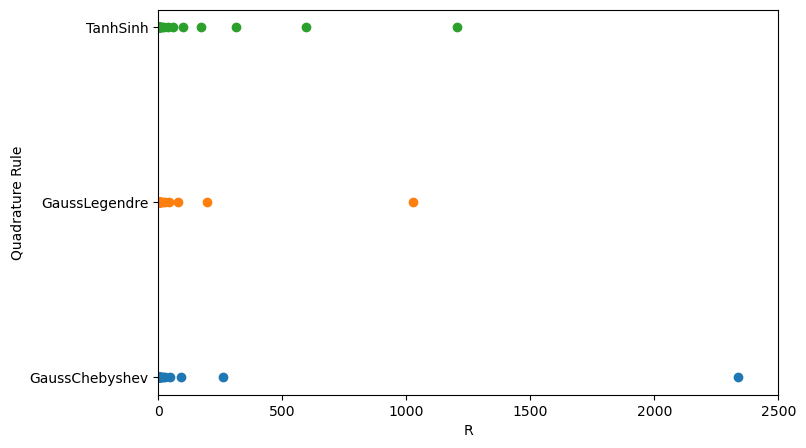

In [64]:
from grid.rtransform import BeckeRTransform

# create a list of names and a list of grid objects
names = ["GaussChebyshev", "GaussLegendre", "TanhSinh"]
onedgrids = [gaus_cheb, gaus_leg, tanh_sinh]

# Becke R-transform (goes from 0 to \infty) to transform the Gauss-Chebyshev grid
rgrid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(gaus_cheb)

# plot the grid
plt.figure(figsize=(8, 5))

plt.xlim(0, 2500)
for i in range(len(onedgrids)):
    rgrid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(onedgrids[i])
    plt.scatter(
        rgrid.points, [i + 1] * len(onedgrids[i].points), marker="o"
    )  # Switched x and y values

# set the y-ticks to be the names
plt.yticks(range(1, len(names) + 1), names)  # Adjusted the range for y-ticks

# set the labels
plt.xlabel("R")
plt.ylabel("Quadrature Rule")

# show the plot
plt.show()

This transformation tends to concentrate the points close to the origin. Because of this, it is usually used for defining radial grids for atoms where the function to integrate is usually more rapidly varying close to the origin (e.g. the electron density is more concentrated close to the nucleus). 

As en example, let's find the following integral:

$$ \int_0^\infty x^2 e^{-x} dx $$

using a one dimensional grid with 20 points and an appropriate transformation. The exact value of the integral is 2.

In [65]:
# set the radial grid
oned = GaussChebyshev(20)
rgrid = BeckeRTransform(0.0, R=1.5).transform_1d_grid(one_d_grid)

# calculate the function values at the grid points
vals = rgrid.points**2 * np.exp(-rgrid.points)

integral = rgrid.integrate(vals)

print(f"Integral of r^2 * exp(-r) from 0 to infinity:{integral} should be close to 2.0")

Integral of r^2 * exp(-r) from 0 to infinity:1.9999900526117749 should be close to 2.0
